### Preparing input data for a model to differentiate between muons and electrons

In this notebook, we prepare the input data that will be feeded to a convolutional neural network to classify a signal as electron or muon. So first of all, we wil get all the electron files from the `cropped_electrons2` directory and we will separate this array into two: one for the energy and the other one for the noise. And then, we will wet the muon files from the `cropped_muons2` directory and we will proceed similary.

In [1]:
import glob
import os, shutil
import matplotlib.pyplot as plt
import numpy as np

Once all the figures are cropped, all of them must have the same size which will correspond to the maxium window shape calculated before for the electrons

In [1]:
window_x, window_y = 192, 242

#this function will be only applied to the energy of the particle, not the noise
def padding_energy(array):
    
    y, x = window_y, window_x  #y,x is the size of the maximum window
    y_image = array.shape[0]
    x_image = array.shape[1]
    
    if y-y_image == 0:
        reshaped = np.pad(array, ((y-y_image, 0), (x-x_image, 0)),  constant_values=0)
    elif x-x_image == 0:
        reshaped = np.pad(array, ((y-y_image, 0), (x-x_image, 0)),  constant_values=0)
    else:
        #generating random numbers to pad the energy image
        random1 = np.random.randint(0, y-y_image)
        random2 = np.random.randint(0, x-x_image)
    
        #padding
        reshaped = np.pad(array, ((random1, y-y_image-random1), (random2, x-x_image-random2)),  constant_values=0)
    return reshaped

#this function will be applied to the noise of the signal to crop the image
def cropping_noise(array):
    
    y, x = window_y, window_x
    reshaped = array[0:window_y, 0:window_x]
    return reshaped

In [2]:
e_dir = '/gpfs/projects/damic/cropped_electrons2'
mu_dir = '/gpfs/projects/damic/cropped_muons2'

We pad the electrons:

In [ ]:
#reshaping both energy and noise electron images, so they can be the same size

dest = e_dir

#list of the files in the original dataset
files = os.listdir(dest)
print(len(files))
#'index' is the number of the file, and 'file' is the name of the file
for index, file in enumerate(files):  
    
    #loading each image as a numpy array
    energy_a = np.load(os.path.join(dest, files[index]))['energy'] 
    noise_a = np.load(os.path.join(dest, files[index]))['noise']
    
    #padding energy images
    energy_a = padding_energy(energy_a)
    
    #cropping noise images
    noise_a = cropping_noise(noise_a)
    
    #copying to the 'cropped_images' directory
    np.savez(os.path.join(dest, file), energy=energy_a, noise=noise_a)

This is an example of the process on an image:

* First, we display the original picture

Text(0.5, 1.0, 'Electron energy')

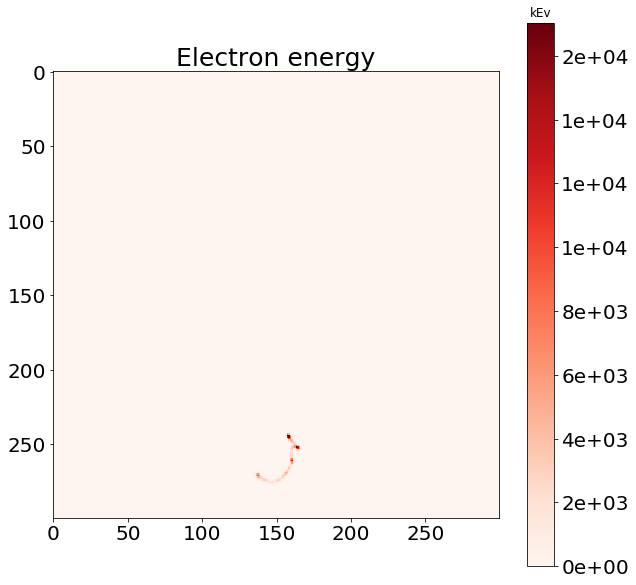

In [19]:
original_dataset_dir = '/gpfs/res_scratch/damic/TFM_DM/CCDimg_fullNoise'

files = glob.glob1(original_dataset_dir,"*11.npz")
f=4
e = np.load(os.path.join(original_dataset_dir, files[f]))['energy']
n = np.load(os.path.join(original_dataset_dir, files[f]))['noise']

fig_e = plt.figure(figsize=(10,10))
plt.imshow(e, cmap='Reds')
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
cb = plt.colorbar(format='%.0e')
cb.ax.set_title('kEv')
cb.ax.tick_params(labelsize=20)
plt.title("Electron energy", fontsize = 25)

* Then, the cropped energy image

Text(0.5, 1.0, 'Electron energy')

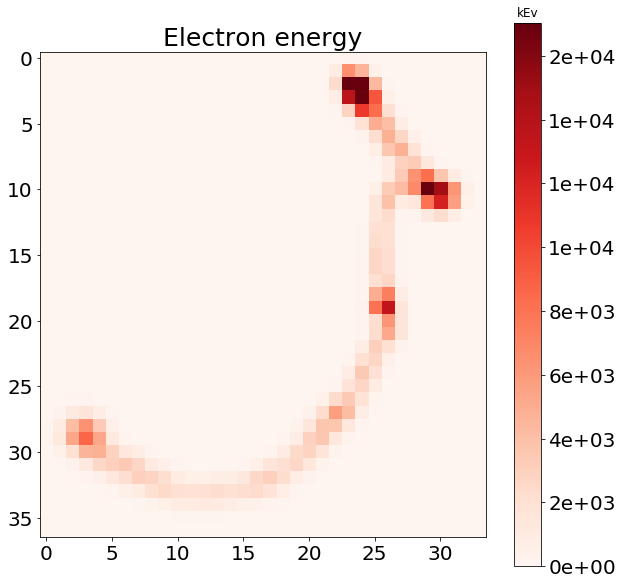

In [9]:
coords = np.argwhere(e)
y_min, x_min = coords.min(axis=0)
y_max, x_max = coords.max(axis=0)
e_b = e[y_min:y_max+1, x_min:x_max+1]

fig_e_b = plt.figure(figsize=(10,10))
plt.imshow(e_b, cmap='Reds')
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
cb = plt.colorbar(format='%.0e')
cb.ax.tick_params(labelsize=20)
cb.ax.set_title('kEv')
plt.title("Electron energy", fontsize=25)

* Finally, the padded energy image for the electron:

Text(0.5, 1.0, 'Electron energy')

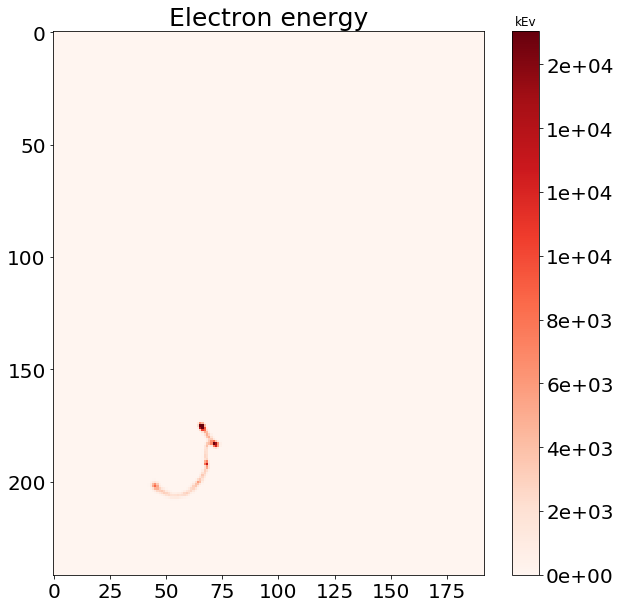

In [28]:
files = glob.glob1(e_dir,"*11.npz")
f=4
e = np.load(os.path.join(e_dir, files[f]))['energy']
n = np.load(os.path.join(e_dir, files[f]))['noise']


fig_e = plt.figure(figsize=(10,10))
plt.imshow(e, cmap='Reds')
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
cb = plt.colorbar(format='%.0e')
cb.ax.tick_params(labelsize=20)
cb.ax.set_title('kEv')
plt.title("Electron energy", fontsize=25)

In [29]:
myPath = '/gpfs/users/lopezs/data/showing_data'
fig_e.savefig(myPath + '/plot_energy_e_padded.png')

Text(0.5, 1.0, 'Noise in the electron signal')

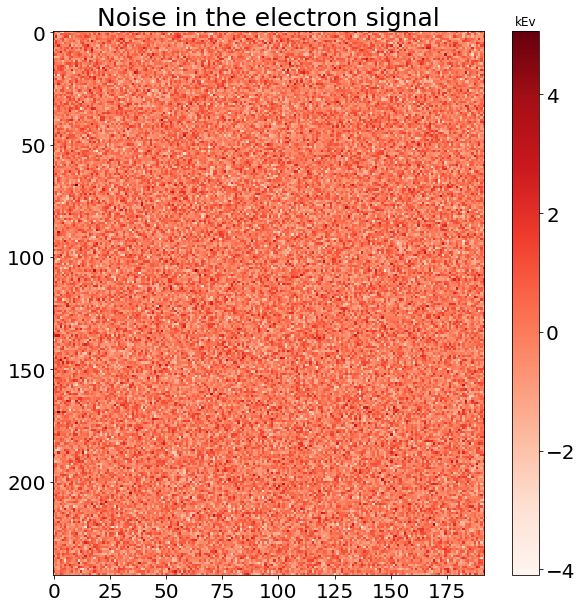

In [26]:
fig_e_d = plt.figure(figsize=(10,10))
plt.imshow(n, cmap='Reds')
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=20)
cb.ax.set_title('kEv')
plt.title("Noise in the electron signal", fontsize=25)

In [27]:
fig_e_d.savefig(myPath + '/plot_noise_e_padded.png')

Now for the muons:

In [ ]:
#reshaping both energy and noise muon images, so they can be the same size
dest = mu_dir

#list of the files in the original dataset
files = os.listdir(dest)
print(len(files))
#'index' is the number of the file, and 'file' is the name of the file
for index, file in enumerate(files):  
    
    #loading each image as a numpy array
    energy_a = np.load(os.path.join(dest, files[index]))['energy'] 
    noise_a = np.load(os.path.join(dest, files[index]))['noise']
    
    #padding energy images
    energy_a = padding_energy(energy_a)
    
    #cropping noise images
    noise_a = cropping_noise(noise_a)
    
    #copying to the 'cropped_images' directory
    np.savez(os.path.join(dest, file), energy=energy_a, noise=noise_a)
    print(index)

Text(0.5, 1.0, 'Muon energy')

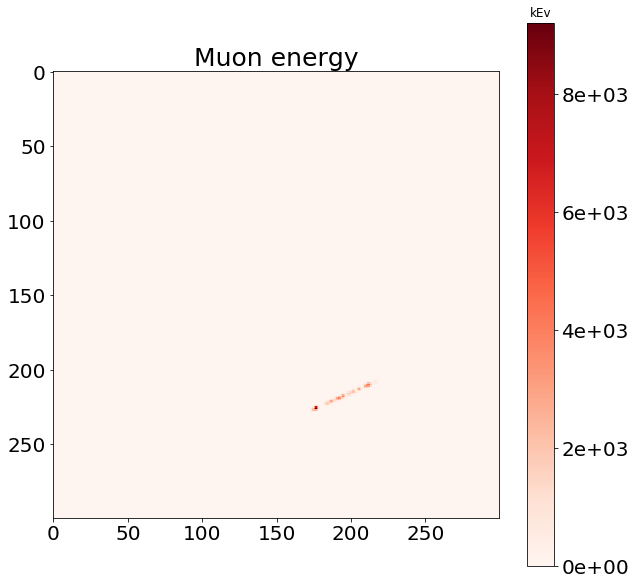

In [20]:
files = glob.glob1(original_dataset_dir,"*13.npz")
f=3453
mu = np.load(os.path.join(original_dataset_dir, files[f]))['energy']
n = np.load(os.path.join(original_dataset_dir, files[f]))['noise']

fig_mu = plt.figure(figsize=(10,10))
plt.imshow(mu, cmap='Reds')
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
cb = plt.colorbar(format='%.0e')
cb.ax.set_title('kEv')
cb.ax.tick_params(labelsize=20)
plt.title("Muon energy", fontsize = 25)

Text(0.5, 1.0, 'Muon energy')

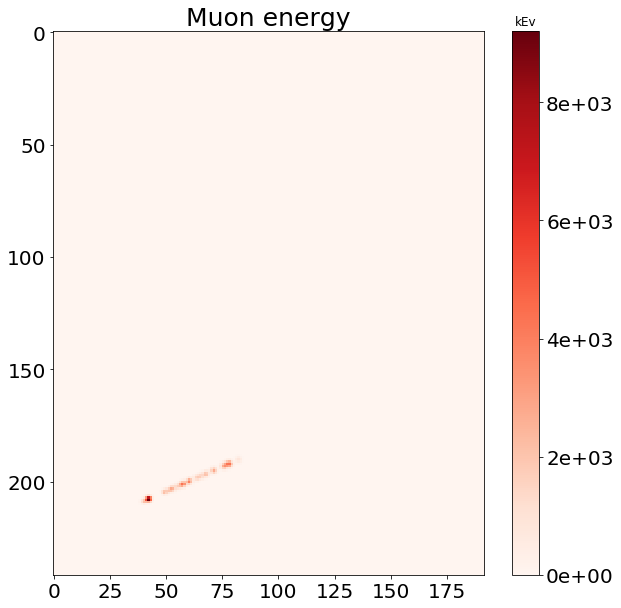

In [18]:
files = glob.glob1(mu_dir,"*13.npz")
mu_s = np.load(os.path.join(mu_dir, files[f]))['energy']
n = np.load(os.path.join(mu_dir, files[f]))['noise']


fig_mu_d = plt.figure(figsize=(10,10))
plt.imshow(mu_s, cmap='Reds')
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
cb = plt.colorbar(format='%.0e')
cb.ax.tick_params(labelsize=20)
cb.ax.set_title('kEv')
plt.title("Muon energy", fontsize=25)

Selecting energy for muons:

In [3]:
muons = glob.glob1(mu_dir,"*13.npz") #all the muons

len_mu = len(muons)

all_muon_energy1 = [np.load(os.path.join(mu_dir, muons[_]))['energy'] for _ in range(1000)]
all_muon_energy1 = np.dstack(all_muon_energy1)
all_muon_energy1 = np.rollaxis(all_muon_energy1,-1)

In [4]:
len_mu

5224

In [5]:
all_muon_energy1.shape

(1000, 242, 192)

In [16]:
all_muon_energy1 = [np.load(os.path.join(mu_dir, muons[_]))['energy'] for _ in range(5000,len_mu)]
all_muon_energy1 = np.dstack(all_muon_energy1)
all_muon_energy1 = np.rollaxis(all_muon_energy1,-1)

In [17]:
labels_muon = np.repeat(1, all_muon_energy1.shape[0])

In [18]:
np.savez_compressed('/gpfs/projects/damic/eVSmu_2pt6', data=all_muon_energy1, labels=labels_muon)

Selecting energy for electrons:

In [3]:
electrons = glob.glob1(e_dir,"*11.npz") #all the electrons

len_e = len(electrons)

print(len_e)

5835


In [17]:
all_e_energy = [np.load(os.path.join(e_dir, electrons[_]))['energy'] for _ in range(5000,len_e)]
all_e_energy = np.dstack(all_e_energy)
all_e_energy = np.rollaxis(all_e_energy,-1)

In [18]:
all_e_energy.shape

(835, 242, 192)

In [19]:
labels_e = np.repeat(0, all_e_energy.shape[0])

In [20]:
np.savez_compressed('/gpfs/projects/damic/eVSmu_2/eVSmu_2pt12e', data=all_e_energy, labels=labels_e)

We observe we have different number of samples for each class, so a under/oversampling must be performed. But first we create the labels. 
* 0 for electron
* 1 for muons

In [7]:
labels_electron = np.repeat(0, all_e_energy_.shape[0])
labels_muon = np.repeat(1, all_muon_energy_.shape[0])

In [8]:
X = np.concatenate((all_e_energy_, all_muon_energy_), axis=0) #energy followed by noise
y = np.concatenate((labels_electron, labels_muon), axis=0) #energy labels followed by noise labels

In [9]:
np.savez_compressed('/gpfs/projects/damic/eVSmu_1', data=X, labels=y)

Now we split the data in train and test so we can perform the under/oversampling on the training and validating dataset

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [12]:
import imblearn
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

Using TensorFlow backend.


In [13]:
print(Counter(y_train))

Counter({0: 1966, 1: 605})


The number of samples is really unbalanced!!!

In [14]:
aux_X = X_train.reshape((X_train.shape[0], X_train.shape[1]* X_train.shape[2]))

In [15]:
#undersample the electrons

under = RandomUnderSampler(sampling_strategy={0: 800} )

X_under, y_under = under.fit_resample(aux_X, y_train)

print(Counter(y_under))

Counter({0: 800, 1: 605})


In [16]:
oversample = RandomOverSampler(sampling_strategy='minority')

X_over, y_over = oversample.fit_resample(X_under, y_under)

print(Counter(y_over))

Counter({0: 800, 1: 800})


In [17]:
X_train = X_over.reshape((X_over.shape[0], X_train.shape[1], X_train.shape[2]))
print(X_train.shape)

(1600, 296, 286)


In [18]:
y_train = y_over

We save the data separately:

In [19]:
np.savez_compressed('/gpfs/projects/damic/eVSmu_tr1', data=X_train, labels=y_train)

In [20]:
np.savez_compressed('/gpfs/projects/damic/eVSmu_te1', data_test=X_test, labels_test=y_test)

Now we split the data in train and test so we can perform the under/oversampling on the training dataset:
* 0.2 for the validation dataset
* 0.2 aprox for the testing dataset
* 0.6 for the training dataset

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, test_size = 0.2)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state=0, test_size = 0.2)

In [13]:
import imblearn
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

Using TensorFlow backend.


In [14]:
print(Counter(y_train))

Counter({0: 1680, 1: 514})


In [15]:
aux_X = X_train.reshape((X_train.shape[0], X_train.shape[1]* X_train.shape[2]))

In [16]:
#undersample the electrons

under = RandomUnderSampler(sampling_strategy={0: 800} )

X_under, y_under = under.fit_resample(aux_X, y_train)

print(Counter(y_under))

Counter({0: 800, 1: 514})


In [17]:
oversample = RandomOverSampler(sampling_strategy='minority')

X_over, y_over = oversample.fit_resample(X_under, y_under)

print(Counter(y_over))

Counter({0: 800, 1: 800})


In [18]:
X_train = X_over.reshape((X_over.shape[0], X_train.shape[1], X_train.shape[2]))
print(X_train.shape)

(1600, 296, 286)


In [19]:
y_train = y_over

We save train, validation and test data separately:

In [24]:
np.savez_compressed('/gpfs/projects/damic/eVSmu_tr2', data=X_train, labels=y_train)

In [25]:
np.savez_compressed('/gpfs/projects/damic/eVSmu_te2', data_test=X_test, labels_test=y_test)

In [26]:
np.savez_compressed('/gpfs/projects/damic/eVSmu_va2', data_v=X_val, labels_v=y_val)

In [ ]:
%run -i 'keras_script.py'

Using TensorFlow backend.
